In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
# Load dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Check he null values
print("Number of null values:",df.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check the shape
print("Shape:", df.shape)

Number of null values: age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Number of duplicate rows: 0
Shape: (299, 13)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df)

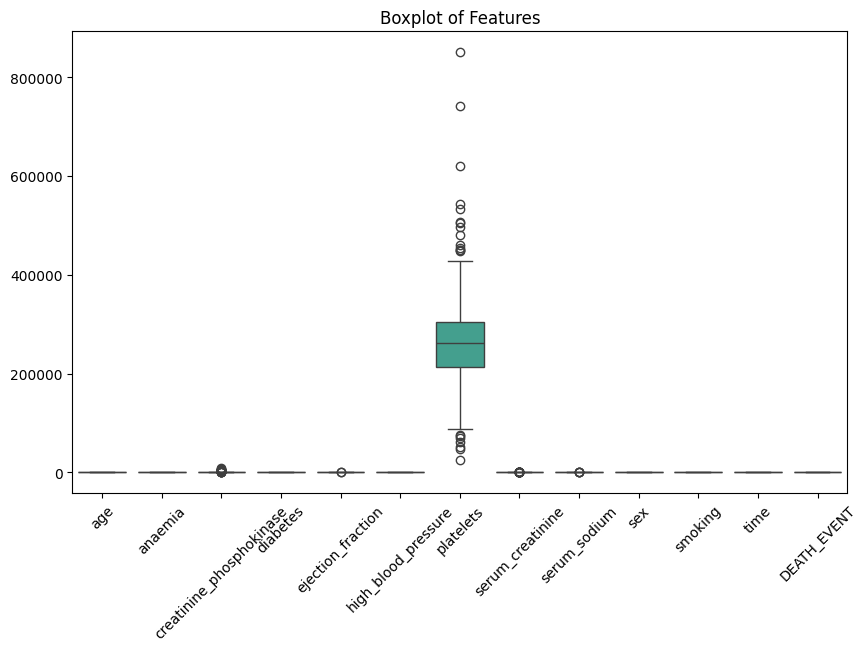

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define columns to check for outliers
columns_to_check = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

# Calculate Z-scores for each column
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Filter rows where any Z-score is greater than 3
outliers = df[(z_scores > 3).any(axis=1)]

# Remove outliers
data_no_outliers = df.drop(outliers.index)

# Print cleaned data
print(data_no_outliers)


      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

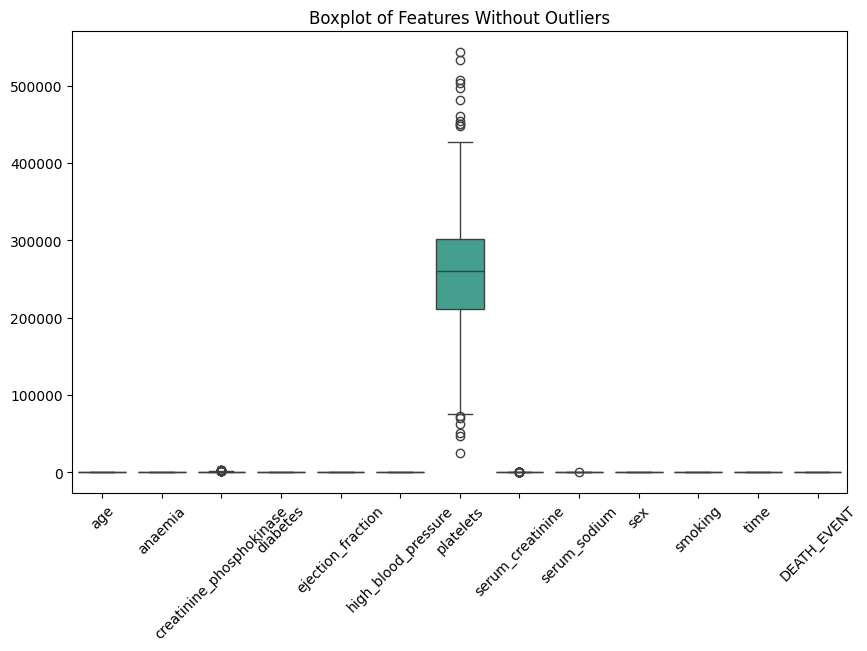

In [ ]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Boxplot of Features Without Outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Describe the cleaned data
data_no_outliers.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.972621,0.435714,456.725000,0.417857,37.835714,0.360714,258820.066536,1.275393,136.825000,0.653571,0.314286,132.696429,0.307143
std,11.815337,0.496738,537.107566,0.494089,11.470461,0.481068,85605.349916,0.615743,3.924203,0.476684,0.465062,77.183559,0.462135
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,114.500000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,239.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,205.250000,1.000000
max,95.000000,1.000000,2794.000000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
# Select two features for 2D visualization
selected_features = ['age', 'serum_creatinine']
X = data_no_outliers[selected_features]
Y = data_no_outliers['smoking']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<Axes: >

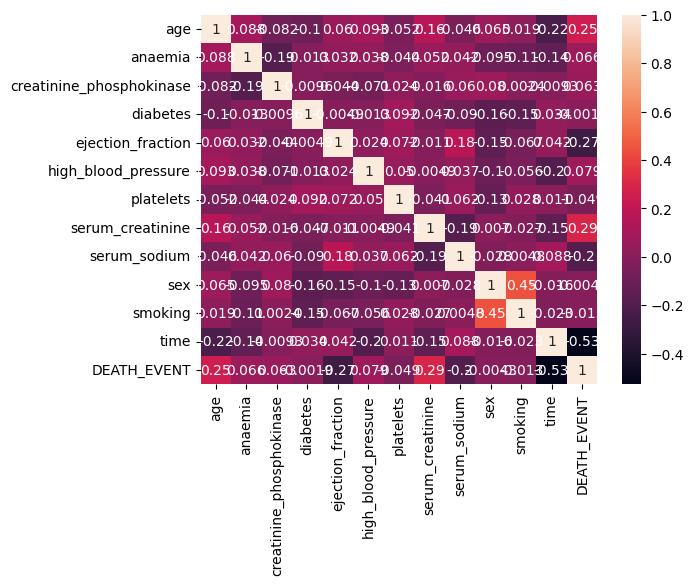

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# Fitting Naive Bayes to the Training set
classifier = ComplementNB()
classifier.fit(X_train, Y_train)

ComplementNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Predictions on test set:\n", y_pred)

Predictions on test set:
 [0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1]


In [ ]:
# Predict output for a sample
sample_index = 0  # Choose any index from the test set
sample_features = X_test.iloc[sample_index].values.reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])

Sample Index: 0
Actual Value: 0
Predicted Value: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[17 25]
 [ 4 10]]


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 48.214285714285715 %


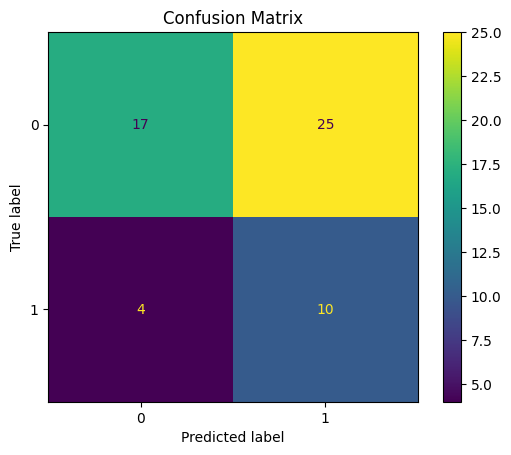

In [ ]:
# Display the confusion matrix
labels = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.40      0.54        42
           1       0.29      0.71      0.41        14

    accuracy                           0.48        56
   macro avg       0.55      0.56      0.47        56
weighted avg       0.68      0.48      0.51        56



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


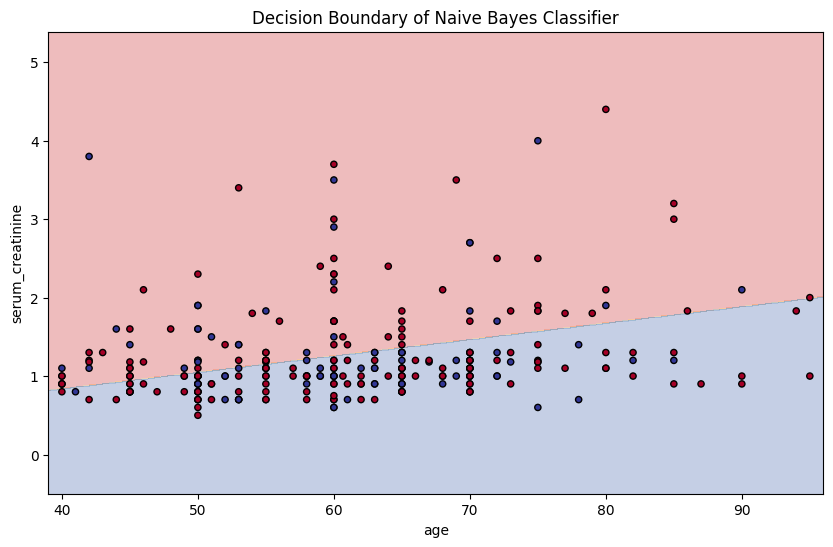

In [ ]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
# Define the grid for the decision boundary
x_min, x_max = X[selected_features[0]].min() - 1, X[selected_features[0]].max() + 1
y_min, y_max = X[selected_features[1]].min() - 1, X[selected_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict Z values for the grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[selected_features[0]], X[selected_features[1]], c=Y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("Decision Boundary of Naive Bayes Classifier")
plt.show()
